import pandas as pd
import numpy as np

In [106]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/raw/train.csv', low_memory=False)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [108]:
threshold = 100

# Drop columns with fewer non-null values than the threshold
filtered_data = df.dropna(axis=1, thresh=threshold)

# Save the filtered data to a new CSV file
filtered_data.to_csv('../data/interim/filtered_data.csv', index=False)

In [109]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

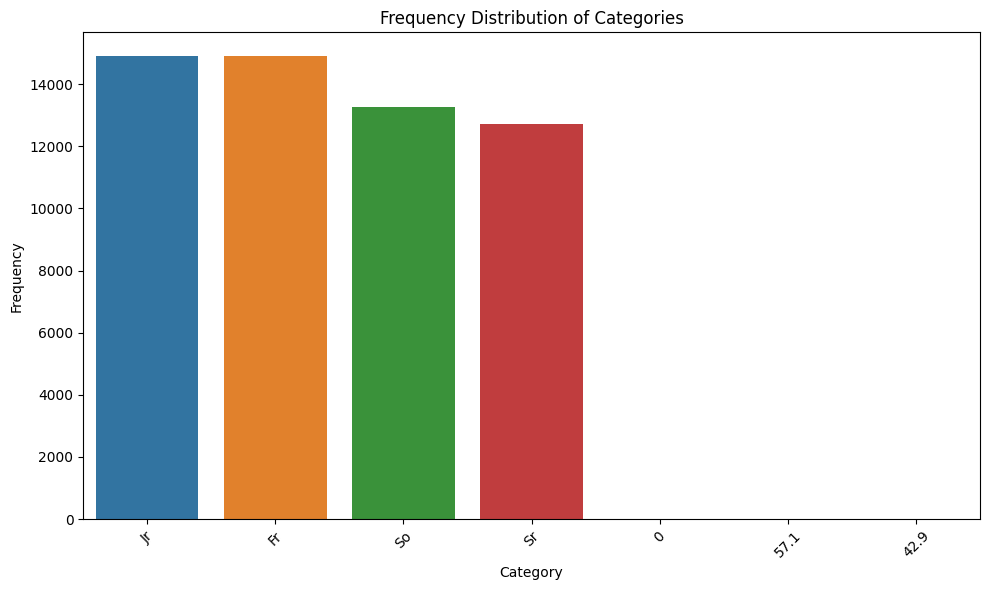

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns


# Count the occurrences of each unique value in the 'yr' column
yr_counts = filtered_data['yr'].value_counts()

unique_names = filtered_data['yr'].unique()



# Extract the names (unique values) from the index of yr_counts
names = yr_counts.index

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=names, y=yr_counts.values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Categories')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [111]:

import warnings

# Frequency encoding the 'yr' categorical feature
frequency_encoded = filtered_data['yr'].value_counts().to_dict()
filtered_data['yr'] = filtered_data['yr'].map(frequency_encoded)

# Filter out all warnings
warnings.filterwarnings("ignore")

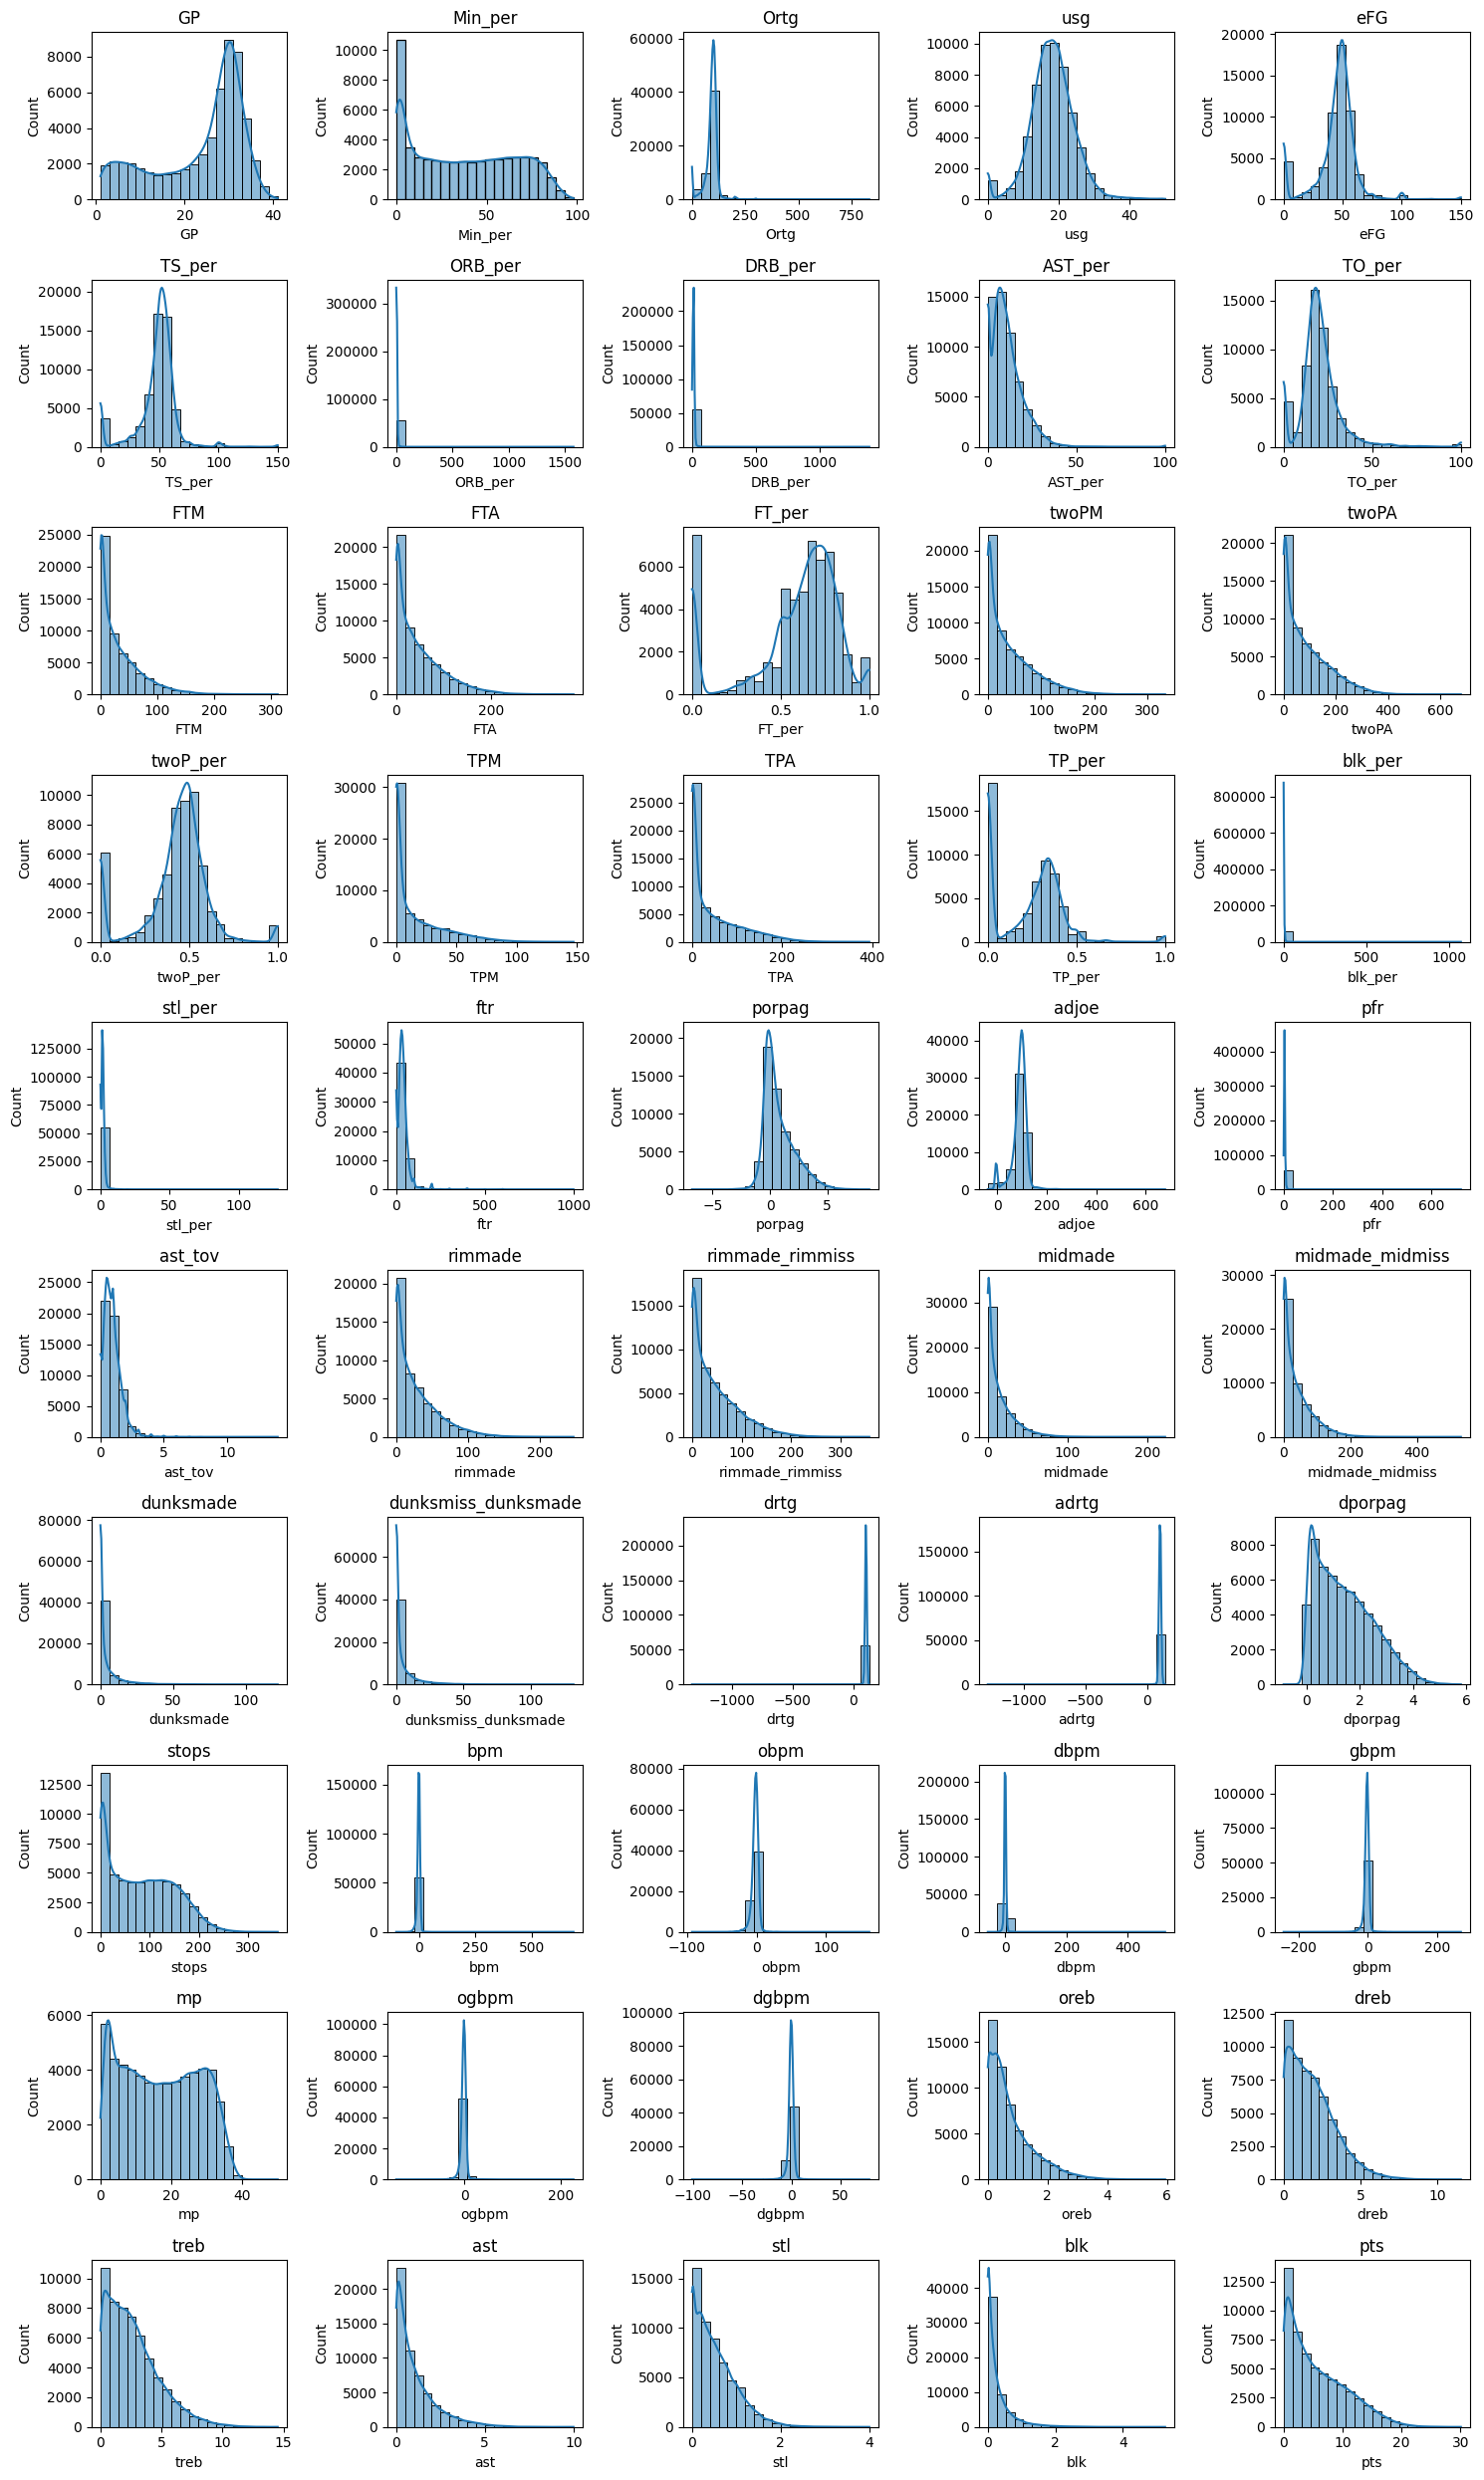

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

# Select the columns of interest
columns_to_plot = [
    'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
    'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
    'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag',
    'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
    'ast', 'stl', 'blk', 'pts'
]

# Plot the distributions
plt.figure(figsize=(15, 25))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(10, 5, i)
    sns.histplot(filtered_data[col], bins=20, kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

warnings.resetwarnings()


In [113]:
import pandas as pd
import numpy as np
from tabulate import tabulate


# List of selected features
selected_features = [
    'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
    'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
    'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag',
    'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
    'ast', 'stl', 'blk', 'pts'
]
# Initialize a list to store the results for each feature
results = []

# Calculate the measures for each feature and store the results
for feature_name in selected_features:
    mean_value = filtered_data[feature_name].mean()
    median_value = filtered_data[feature_name].median()
    mode_value = filtered_data[feature_name].mode()[0]
    range_value = filtered_data[feature_name].max() - df[feature_name].min()
    iqr_value = filtered_data[feature_name].quantile(0.75) - df[feature_name].quantile(0.25)
    std_deviation = filtered_data[feature_name].std()
    variance = filtered_data[feature_name].var()
    skewness = filtered_data[feature_name].skew()
    kurtosis = filtered_data[feature_name].kurtosis()
    
    # Append the results for the current feature to the list
    results.append([
        feature_name, mean_value, median_value, mode_value, range_value,
        iqr_value, std_deviation, variance, skewness, kurtosis
    ])

# Define the headers for the table
headers = [
    "Feature", "Mean", "Median", "Mode", "Range",
    "IQR", "Std Deviation", "Variance", "Skewness", "Kurtosis"
]

# Print the table using the tabulate function
print(tabulate(results, headers=headers, tablefmt="grid"))


+---------------------+------------+------------+------------+------------+------------+-----------------+--------------+-------------+---------------+
| Feature             |       Mean |     Median |       Mode |      Range |        IQR |   Std Deviation |     Variance |    Skewness |      Kurtosis |
+=====================+============+============+============+============+============+=================+==============+=============+===============+
| GP                  |  23.412    |  28        |  31        |   40       |  15        |       10.0905   |  101.819     |  -0.844862  |    -0.575652  |
+---------------------+------------+------------+------------+------------+------------+-----------------+--------------+-------------+---------------+
| Min_per             |  37.3252   |  35.9      |   0.2      |   98       |  52.7      |       28.0619   |  787.47      |   0.180464  |    -1.3048    |
+---------------------+------------+------------+------------+------------+------------+

In [114]:
from sklearn.impute import KNNImputer

# List of features with normal distribution
normal_distribution_features = ['Ortg', 'eFG', 'TS_per', 'adjoe']

# Create a DataFrame containing only the selected features
selected_features_df = filtered_data[normal_distribution_features]

# Initialize KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Impute missing values using KNN
imputed_data = knn_imputer.fit_transform(selected_features_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=normal_distribution_features)

# Replace the original columns with the imputed values
filtered_data[normal_distribution_features] = imputed_df

# Impute dunks_ratio, dunksmiss_dunksmade, rim_ratio, mid_ratio with the median
median_dunks_ratio = 0.259
median_dunksmiss_dunksmade = 0.363
median_rim_ratio = 0.638
median_mid_ratio = 0.384

filtered_data['dunks_ratio'].fillna(median_dunks_ratio, inplace=True)
filtered_data['dunksmiss_dunksmade'].fillna(median_dunksmiss_dunksmade, inplace=True)
filtered_data['rim_ratio'].fillna(median_rim_ratio, inplace=True)
filtered_data['mid_ratio'].fillna(median_mid_ratio, inplace=True)


# Impute Rec_Rank with a value outside the range of existing ranks (e.g., -1)
filtered_data['Rec_Rank'].fillna(-1, inplace=True)

# Impute pick with the mode
mode_pick = filtered_data['pick'].mode().iloc[0]
filtered_data['pick'].fillna(mode_pick, inplace=True)

# Impute rimmade_rimmiss with the median
median_rimmade_rimmiss = 1.571
filtered_data['rimmade_rimmiss'].fillna(median_rimmade_rimmiss, inplace=True)

# Impute dunksmade, midmade, rimmade with zero
filtered_data['dunksmade'].fillna(0, inplace=True)
filtered_data['midmade'].fillna(0, inplace=True)
filtered_data['rimmade'].fillna(0, inplace=True)


In [115]:
# List of categorical features
categorical_features = ['yr', 'ht', 'num']

# List of features with non-normal distribution
skewed_features = ['GP', 'Min_per', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
                   'ftr', 'porpag', 'pfr', 'ast_tov', 'rimmade_rimmiss', 'midmade_midmiss',
                   'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm',
                   'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']

# Impute categorical features with mode
filtered_data[categorical_features] = filtered_data[categorical_features].fillna(filtered_data[categorical_features].mode().iloc[0])

# Impute skewed features with median
filtered_data[skewed_features] = filtered_data[skewed_features].fillna(filtered_data[skewed_features].median())

# Impute percentage features with a reasonable central value (e.g., median)
percentage_features = ['FT_per', 'TP_per', 'blk_per']
central_value = filtered_data[percentage_features].median()
filtered_data[percentage_features] = filtered_data[percentage_features].fillna(central_value)


/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp/.venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [116]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [117]:
# Dropping columns that don't seem to add value to the overall model prediction.
columns_to_drop = ['year', 'yr', 'ht', 'num', 'team', 'conf', 'type', 'player_id']
filtered_data.drop(columns_to_drop, axis=1, inplace=True)
filtered_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   56091 non-null  int64  
 1   Min_per              56091 non-null  float64
 2   Ortg                 56091 non-null  float64
 3   usg                  56091 non-null  float64
 4   eFG                  56091 non-null  float64
 5   TS_per               56091 non-null  float64
 6   ORB_per              56091 non-null  float64
 7   DRB_per              56091 non-null  float64
 8   AST_per              56091 non-null  float64
 9   TO_per               56091 non-null  float64
 10  FTM                  56091 non-null  int64  
 11  FTA                  56091 non-null  int64  
 12  FT_per               56091 non-null  float64
 13  twoPM                56091 non-null  int64  
 14  twoPA                56091 non-null  int64  
 15  twoP_per             56091 non-null 

In [118]:
y = filtered_data.pop('drafted')

In [119]:
X = filtered_data

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   56091 non-null  int64  
 1   Min_per              56091 non-null  float64
 2   Ortg                 56091 non-null  float64
 3   usg                  56091 non-null  float64
 4   eFG                  56091 non-null  float64
 5   TS_per               56091 non-null  float64
 6   ORB_per              56091 non-null  float64
 7   DRB_per              56091 non-null  float64
 8   AST_per              56091 non-null  float64
 9   TO_per               56091 non-null  float64
 10  FTM                  56091 non-null  int64  
 11  FTA                  56091 non-null  int64  
 12  FT_per               56091 non-null  float64
 13  twoPM                56091 non-null  int64  
 14  twoPA                56091 non-null  int64  
 15  twoP_per             56091 non-null 

In [121]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (33654, 55)
Validation set: (11218, 55)
Test set: (11219, 55)


In [122]:
# Check class distribution for each set
train_class_distribution = y_train.value_counts()
val_class_distribution = y_val.value_counts()
test_class_distribution = y_test.value_counts()

print("Train class distribution:")
print(train_class_distribution)

print("\nValidation class distribution:")
print(val_class_distribution)

print("\nTest class distribution:")
print(test_class_distribution)

Train class distribution:
drafted
0.0    33321
1.0      333
Name: count, dtype: int64

Validation class distribution:
drafted
0.0    11114
1.0      104
Name: count, dtype: int64

Test class distribution:
drafted
0.0    11120
1.0       99
Name: count, dtype: int64


In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler and SMOTE
scaler = StandardScaler()
smote = SMOTE(random_state=42)

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Resample the scaled training set using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp/.venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp/.venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp/.venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning

In [124]:
from joblib import dump, load
dump(scaler,  '../models/scaler.joblib')
dump(smote,  '../models/smote.joblib')

['../models/smote.joblib']

In [125]:
# Resample the validation set
X_val_scaled = scaler.transform(X_val)
X_val_resampled, y_val_resampled = smote.fit_resample(X_val_scaled, y_val)

# Resample the test set
X_test_scaled = scaler.transform(X_test)

X_test_resampled, y_test_resampled = smote.fit_resample(X_test_scaled, y_test)


/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp/.venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp/.venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp/.venv/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning

In [126]:
X_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_val_resampled = pd.DataFrame(X_val_resampled, columns=X_val.columns)
X_test_resampled = pd.DataFrame(X_test_resampled, columns=X_test.columns)

y_train_resampled = pd.Series(y_train_resampled)
y_val_resampled = pd.Series(y_val_resampled)
y_test_resampled = pd.Series(y_test_resampled)

# Save the DataFrames to CSV files
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val_resampled.to_csv('../data/processed/X_val.csv', index=False)
X_test_resampled.to_csv('../data/processed/X_test.csv', index=False)
y_train_resampled.to_csv('../data/processed/y_train.csv', index=False)
y_val_resampled.to_csv('../data/processed/y_val.csv', index=False)
y_test_resampled.to_csv('../data/processed/y_test.csv', index=False)


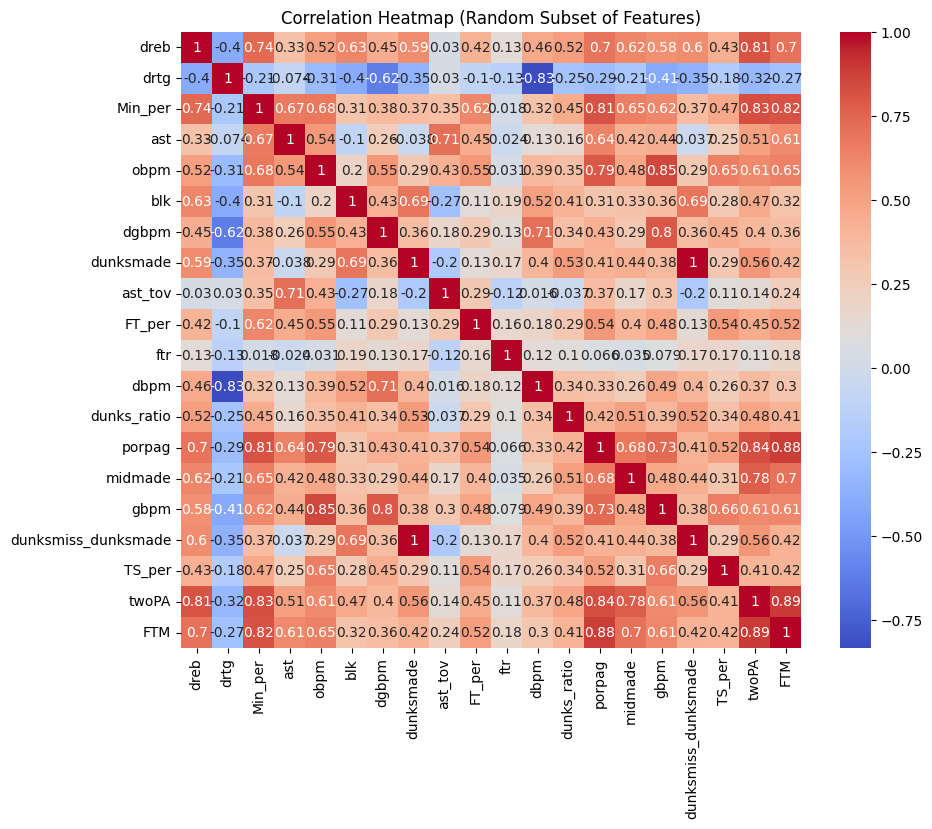

Pairs of Highly Correlated Features:
[('dreb', 'Min_per'), ('dreb', 'twoPA'), ('dreb', 'FTM'), ('drtg', 'dbpm'), ('Min_per', 'porpag'), ('Min_per', 'twoPA'), ('Min_per', 'FTM'), ('ast', 'ast_tov'), ('obpm', 'porpag'), ('obpm', 'gbpm'), ('dgbpm', 'dbpm'), ('dgbpm', 'gbpm'), ('dunksmade', 'dunksmiss_dunksmade'), ('porpag', 'gbpm'), ('porpag', 'twoPA'), ('porpag', 'FTM'), ('midmade', 'twoPA'), ('midmade', 'FTM'), ('twoPA', 'FTM')]


In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Convert resampled training data numpy array back to DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Calculate correlation matrix for resampled training data
correlation_matrix_train = X_train_resampled_df.corr()

# Randomly select 20 features for visualization
random_features = random.sample(list(correlation_matrix_train.columns), 20)
correlation_matrix_subset = correlation_matrix_train.loc[random_features, random_features]

# Create a heatmap of the subset of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Random Subset of Features)")
plt.show()

# Set a threshold for collinearity
threshold = 0.7

# Identify pairs of highly correlated features
collinear_pairs = []

for i in range(len(correlation_matrix_subset.columns)):
    for j in range(i + 1, len(correlation_matrix_subset.columns)):
        if abs(correlation_matrix_subset.iloc[i, j]) > threshold:
            collinear_pairs.append((correlation_matrix_subset.columns[i], correlation_matrix_subset.columns[j]))

print("Pairs of Highly Correlated Features:")
print(collinear_pairs)


In [128]:
import scipy.stats as stats

# Set a threshold for collinearity
threshold = 0.7

# Testing a few Pairs of highly correlated features to check if they are statistically significant using Hypothesis testing
collinear_pairs = [('GP', 'Min_per'), ('Min_per', 'FTM'), ('Min_per', 'FTA'), 
                   ('Min_per', 'twoPM'), ('Min_per', 'twoPA'), ('Min_per', 'porpag'), 
                   ('Ortg', 'eFG'), ('Ortg', 'TS_per'), ('Ortg', 'adjoe'), 
                   ('eFG', 'TS_per'), ('eFG', 'twoP_per'), ('eFG', 'adjoe'), 
                   ('TS_per', 'twoP_per'), ('TS_per', 'adjoe'), ('ORB_per', 'blk_per'), 
                   ('FTM', 'FTA'), ('FTM', 'twoPM'), ('FTM', 'twoPA'), 
                   ('FTM', 'porpag'), ('FTA', 'twoPM'), ('FTA', 'twoPA'), 
                   ('FTA', 'porpag'), ('twoPM', 'twoPA'), ('twoPM', 'porpag'), 
                   ('twoPA', 'porpag'), ('TPM', 'TPA'), ('porpag', 'adjoe')]

# Loop through each pair and perform Pearson correlation test
for feature1, feature2 in collinear_pairs:
    correlation_coefficient, p_value = stats.pearsonr(X_train_resampled_df[feature1], X_train_resampled_df[feature2])
    
    print(f"Pair: {feature1}, {feature2}")
    print("Pearson Correlation Coefficient:", correlation_coefficient)
    print("p-value:", p_value)
    
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")
    
    print()


Pair: GP, Min_per
Pearson Correlation Coefficient: 0.8246552997275226
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, FTM
Pearson Correlation Coefficient: 0.8184083147864838
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, FTA
Pearson Correlation Coefficient: 0.8167278588478791
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, twoPM
Pearson Correlation Coefficient: 0.7889403912224758
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, twoPA
Pearson Correlation Coefficient: 0.8322251367273868
p-value: 0.0
The correlation is statistically significant.

Pair: Min_per, porpag
Pearson Correlation Coefficient: 0.8143034014276752
p-value: 0.0
The correlation is statistically significant.

Pair: Ortg, eFG
Pearson Correlation Coefficient: 0.8037901355059257
p-value: 0.0
The correlation is statistically significant.

Pair: Ortg, TS_per
Pearson Correlation Coefficient: 0.8685199117632552
p-value: 

In [ ]:
#It seems that the p-values for all of the correlation tests are very close to 0, indicating that the observed correlations are statistically significant. 
#This suggests a strong linear relationship between the correlated features. Since the p-value is less than the commonly used significance level of 0.05, 
#we have enough evidence to reject the null hypothesis and conclude that these correlations are not due to random chance.

In [129]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train_resampled_df, y_train_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances for all features
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                Feature  Importance
36                 pick    0.149568
44                 gbpm    0.112173
22               porpag    0.103842
39              dporpag    0.072949
23                adjoe    0.063467
46                ogbpm    0.061384
41                  bpm    0.044071
25             Rec_Rank    0.043108
40                stops    0.040392
14                twoPA    0.037091
13                twoPM    0.034216
54                  pts    0.032686
11                  FTA    0.025988
10                  FTM    0.020144
38                adrtg    0.015049
34  dunksmiss_dunksmade    0.013206
0                    GP    0.011044
42                 obpm    0.009819
33            dunksmade    0.009143
29              midmade    0.006521
35          dunks_ratio    0.006158
47                dgbpm    0.005963
27              rimmade    0.005884
49                 dreb    0.005156
43                 dbpm    0.004812
53                  blk    0.004338
30     